## Definindo o Problema: Analisando dados das casas de Boston, nos EUA e fazendo previsoes.
## The Boston Housing Dataset
## http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

### Seu modelo deve prever a MEDV (Valor da Mediana de ocupação das casas). Utilize um modelo de rede neural!

In [1]:
library(MASS) #Contém o dataset Boston
library(neuralnet)

Warning message:
"package 'MASS' was built under R version 4.2.3"
Warning message:
"package 'neuralnet' was built under R version 4.2.3"


In [2]:
#Importanto os dados do dataset Boston
set.seed(101) #reprodutibilidade
dados <- Boston
head(dados)
dim(dados)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


[1] 506  14

### Sobre as variáveis:

crim:Taxa de criminalidade per capita por cidade.  
zn: Proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados.  
indus:Proporção de acres de negócios não comerciais por cidade.  
chas: Variável dummy (binária) indicando se a propriedade está adjacente ao rio Charles (1 se sim, 0 se não).
nox: Concentração de óxidos nítricos (em partes por 10 milhões).  
rm:Número médio de quartos por habitação.  
age:Proporção de unidades ocupadas pelos proprietários construídas antes de 1940.  
dis: Distância ponderada até cinco centros de emprego em Boston.  
rad: Índice de acessibilidade a rodovias radiais.  
tax: Taxa de imposto sobre a propriedade.   
ptratio: Razão aluno-professor por cidade.  
black:1000(Bk - 0.63)^2, onde Bk é a proporção de afro-americanos por cidade.  
lstat: Percentagem da população de status mais baixo da cidade.  
medv: Valor médio das residências ocupadas pelos proprietários em milhares de dólares.  

In [3]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following object is masked from 'package:neuralnet':

    compute


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
glimpse(dados)

Rows: 506
Columns: 14
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15…
$ black   <dbl> 396.90, 396.90, 392.83, 394.63, 396.90, 394.12, 395.60, 396.90…
$ lstat   <dbl> 4.

In [5]:
summary(dados)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [6]:
colSums(is.na(dados))

crim      zn   indus    chas     nox      rm     age     dis     rad     tax 
      0       0       0       0       0       0       0       0       0       0 
ptratio   black   lstat    medv 
      0       0       0       0

### Normalização 

Como o primeiro passo, vamos abordar o pré-processamento de dados.
É uma boa prática normalizar seus dados antes de treinar uma rede neural.
Dependendo do seu conjunto de dados, evitando a normalização pode levar a resultados inuteis ou a processo de treinamento muito dificil(na maioria das vezes o algoritmo não iria convergir antes do numero de iteracoes maximo permitido).
Você pode escolher diferentes metodos para dimensionar os dados (normalização-z, escala min-max, etc...)
Normalmente a escala nos intervalos [0,1] ou [1,1] tende a dar melhores resultados.
Desta forma, o pré-processamento de dados, incluindo a normalização, é um passo crucial ao treinar redes neurais. Normalizar os dados ajuda a garantir que todas as variáveis tenham uma escala semelhante, o que pode melhorar a convergência do modelo durante o treinamento e evitar que algumas variáveis dominem outras. 
- Normalização-Z (Z-Score Normalization): Cada valor é transformado subtraindo a média e dividindo pelo desvio padrão da variável. Isso coloca os dados em uma escala onde a média é 0 e o desvio padrão é 1.  
- Escala Min-Max: Cada valor é transformado para um intervalo específico, como [0,1] ou [-1,1]. A transformação é feita subtraindo o valor mínimo e dividindo pela diferença entre o valor máximo e o valor mínimo.

In [7]:
#Normalização 
#Encontrando valores minimo e maximo pela coluna.
max <- apply(dados,2, max)
min <- apply(dados,2, min)
data.frame(max)
data.frame(min)

,max
,<dbl>
crim,88.9762
zn,100.0000
indus,27.7400
chas,1.0000
nox,0.8710
rm,8.7800
age,100.0000
dis,12.1265
rad,24.0000


,min
,<dbl>
crim,0.00632
zn,0.00000
indus,0.46000
chas,0.00000
nox,0.38500
rm,3.56100
age,2.90000
dis,1.12960
rad,1.00000


**Sobre o código: scale(dados, center = min, scale = max - min):**

- dados: O conjunto de dados a ser escalado;
- center = min: Isso significa que, para cada coluna, o valor mínimo será subtraído de cada elemento dessa coluna;
 - scale = max - min:Isso significa que, para cada coluna, cada elemento será dividido pela amplitude daquela coluna (diferença entre o máximo e o mínimo).
Obs.:
- SE **center** for TRUE, os dados são centrados subtraindo-se a média, se center for FALSE, nenhum centro será aplicado;
- Se **scale** for TRUE, os dados são escalados dividindo-os pelo desvio padrão.Se scale for FALSE, nenhum escalonamento será aplicado

In [8]:
dados_normalizados <- data.frame(scale(dados, center = min, scale= max - min))
head(dados_normalizados)
class(dados_normalizados)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000000,0.18,0.06781525,0,0.3148148,0.5775053,0.6416066,0.2692031,0.00000000,0.20801527,0.2872340,1.0000000,0.08967991,0.4222222
2,0.0002359225,0.00,0.24230205,0,0.1728395,0.5479977,0.7826982,0.3489620,0.04347826,0.10496183,0.5531915,1.0000000,0.20447020,0.3688889
3,0.0002356977,0.00,0.24230205,0,0.1728395,0.6943859,0.5993821,0.3489620,0.04347826,0.10496183,0.5531915,0.9897373,0.06346578,0.6600000
4,0.0002927957,0.00,0.06304985,0,0.1502058,0.6585553,0.4418126,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852,0.6311111
5,0.0007050701,0.00,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
6,0.0002644715,0.00,0.06304985,0,0.1502058,0.5497222,0.5746653,0.4485446,0.08695652,0.06679389,0.6489362,0.9929901,0.09602649,0.5266667


[1] "data.frame"

In [9]:
library(caTools)

Warning message:
"package 'caTools' was built under R version 4.2.3"


In [10]:
# Dividindo os dados em treino e teste 
split <- sample.split(dados_normalizados$medv, SplitRatio = 0.70)  #70% dos dados salvo em amostra

In [11]:
#Criando dados de treino (70% dos dados)
treino <- subset(dados_normalizados, split ==TRUE)
head(treino)
dim(treino)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.0002356977,0.000,0.24230205,0,0.1728395,0.6943859,0.5993821,0.3489620,0.04347826,0.10496183,0.5531915,0.9897373,0.06346578,0.6600000
4,0.0002927957,0.000,0.06304985,0,0.1502058,0.6585553,0.4418126,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852,0.6311111
5,0.0007050701,0.000,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
6,0.0002644715,0.000,0.06304985,0,0.1502058,0.5497222,0.5746653,0.4485446,0.08695652,0.06679389,0.6489362,0.9929901,0.09602649,0.5266667
7,0.0009213230,0.125,0.27162757,0,0.2860082,0.4696302,0.6560247,0.4029226,0.17391304,0.23664122,0.2765957,0.9967220,0.29525386,0.3977778
10,0.0018401733,0.125,0.27162757,0,0.2860082,0.4680973,0.8547889,0.4967309,0.17391304,0.23664122,0.2765957,0.9743053,0.42411700,0.3088889


[1] 367  14

In [12]:
#Criando dados de testes
teste <- subset(dados_normalizados, split == FALSE)
head(teste)
dim(teste)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000000,0.180,0.06781525,0,0.3148148,0.5775053,0.6416066,0.2692031,0.00000000,0.2080153,0.2872340,1.0000000,0.08967991,0.4222222
2,0.0002359225,0.000,0.24230205,0,0.1728395,0.5479977,0.7826982,0.3489620,0.04347826,0.1049618,0.5531915,1.0000000,0.20447020,0.3688889
8,0.0015536719,0.125,0.27162757,0,0.2860082,0.5002874,0.9598352,0.4383872,0.17391304,0.2366412,0.2765957,1.0000000,0.48068433,0.4911111
9,0.0023032514,0.125,0.27162757,0,0.2860082,0.3966277,1.0000000,0.4503542,0.17391304,0.2366412,0.2765957,0.9741036,0.77814570,0.2555556
11,0.0024566741,0.125,0.27162757,0,0.2860082,0.5395670,0.9412976,0.4744155,0.17391304,0.2366412,0.2765957,0.9889556,0.51655629,0.2222222
12,0.0012492992,0.125,0.27162757,0,0.2860082,0.4690554,0.8238929,0.4635034,0.17391304,0.2366412,0.2765957,1.0000000,0.31843267,0.3088889


[1] 139  14

### Treinando o modelo

In [13]:
rede_neural <- neuralnet(medv ~ ., data = treino, hidden = c(5,3), linear.output = TRUE)

**hidden = c(5,3):** Define a arquitetura da rede neural. Neste caso, temos duas camadas ocultas, com 5 neurônios na primeira camada oculta e 3 neurônios na segunda camada oculta. A escolha do número de neurônios em cada camada oculta é uma decisão de projeto e pode depender da complexidade do problema.  
**linear.output = TRUE:** Indica que a saída da rede neural deve ser linear

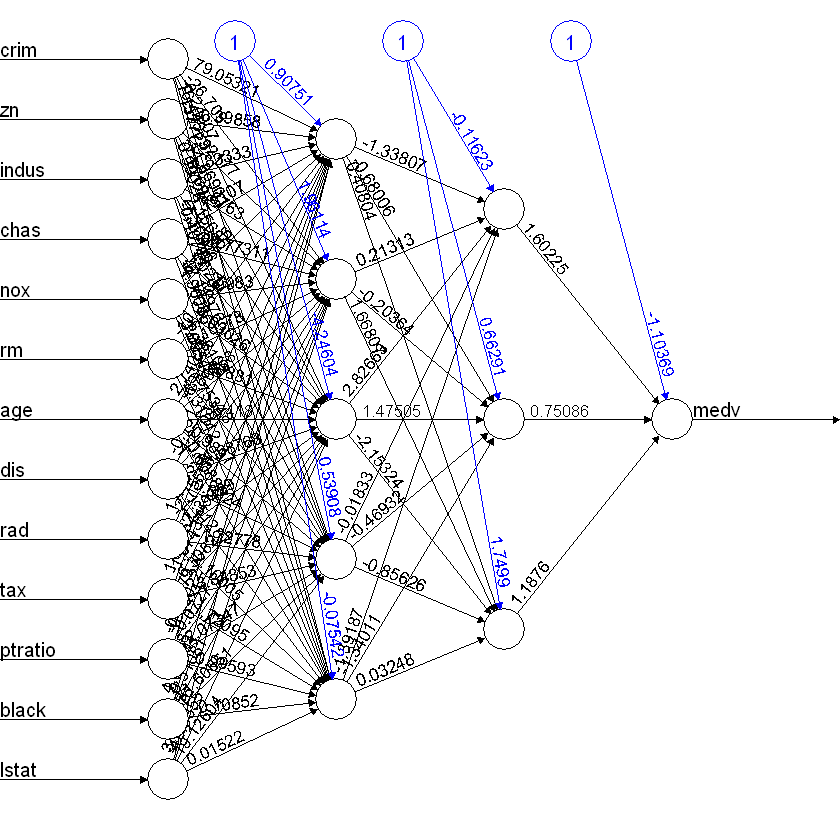

In [14]:
#O argumento rep é usado para especificar o tipo de gráfico a ser criado.
#Neste caso, rep = "best" indica que a melhor representação do modelo deve ser utilizada para o gráfico.
plot(rede_neural, rep = 'best')

In [15]:
#Fazendo previsão com os dados de testes
rede_neural_previsao <- predict(rede_neural, teste [1:13])

In [16]:
head(rede_neural_previsao)
class(rede_neural_previsao)

1,0.5115087
2,0.4106871
8,0.3237070
9,0.2093458
11,0.3335626
12,0.3396184


[1] "matrix" "array"

In [17]:
rede_neural_previsao <-data.frame(rede_neural_previsao)
class(rede_neural_previsao)
head(rede_neural_previsao)

[1] "data.frame"

,rede_neural_previsao
,<dbl>
1,0.5115087
2,0.4106871
8,0.3237070
9,0.2093458
11,0.3335626
12,0.3396184


### Como os dados foram normalizados anteriormente, agora precisamos retorná-los ao formato original. 

In [18]:
previsoes <- rede_neural_previsao$rede_neural_previsao * (max(dados$medv) - min(dados$medv)) + min(dados$medv)
head(data.frame(previsoes))

,previsoes
,<dbl>
1,28.01789
2,23.48092
3,19.56681
4,14.42056
5,20.01032
6,20.28283


In [19]:
teste_convert <- (teste$medv) * (max(dados$medv) - min(dados$medv)) + min(dados$medv)
head(data.frame(teste_convert))

,teste_convert
,<dbl>
1,24.0
2,21.6
3,27.1
4,16.5
5,15.0
6,18.9


In [20]:
# Calculando o Mean Squared Error
MSE.nn <- sum((teste_convert - previsoes)^2)/nrow(teste)
MSE.nn

[1] 15.1656

In [21]:
# Obtendo os erros de previsao
error.df <- data.frame(teste_convert, previsoes)
head(error.df)

,teste_convert,previsoes
,<dbl>,<dbl>
1,24.0,28.01789
2,21.6,23.48092
3,27.1,19.56681
4,16.5,14.42056
5,15.0,20.01032
6,18.9,20.28283


In [22]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


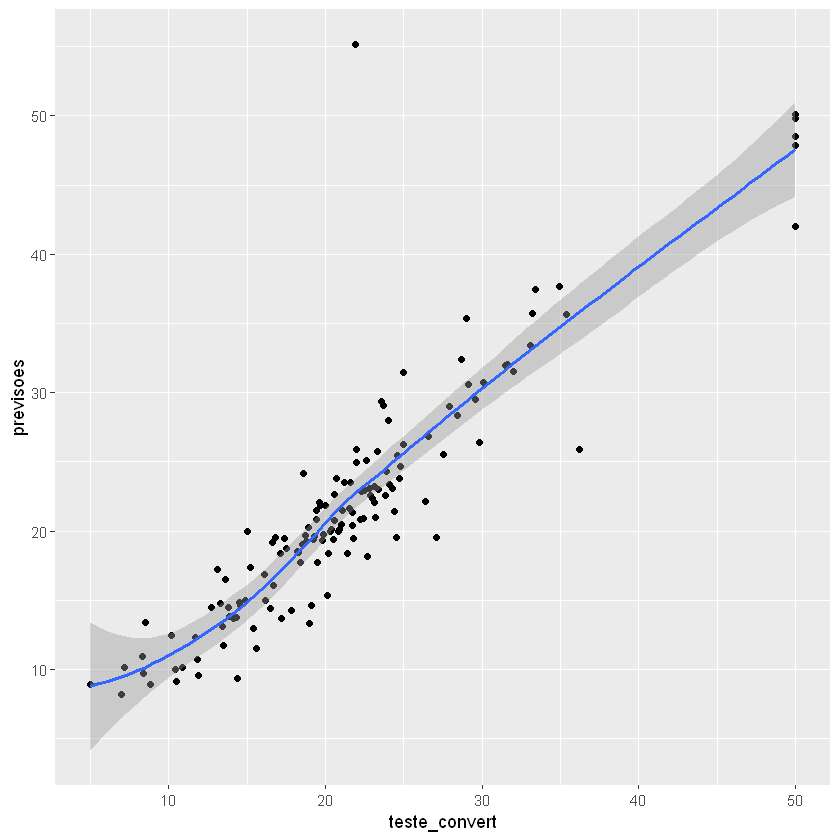

In [23]:
# Plot dos erros
library(ggplot2)
ggplot(error.df, aes(x = teste_convert,y = previsoes)) + 
  geom_point() + stat_smooth()
